In [46]:
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import logging
logging.getLogger("tensorflow").setLevel(logging.ERROR)
tf.autograph.set_verbosity(0)

prep data

In [58]:
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv('WineQT.csv')
d=[df["alcohol"],df["quality"]]
x=[]

xinit=np.transpose(np.matrix(d))
y=[]
y_simpl=[]

for loop in range(len(xinit)):
    if loop%10==0:
        x.append([xinit[loop,0],xinit[loop,1]])
        
        if(xinit[loop,0]<=12 and xinit[loop,1]>5 ):
            y.append(1)
        else:
            y.append(0)

x=np.array(x)


In [48]:
def plot_data(X, y, ax, pos_label="y=1", neg_label="y=0", s=80, loc='best',idx=0,idy=1 ):
    """ plots logistic data with two axis """
    # Find Indices of Positive and Negative Examples
    pos=[]
    neg=[]
    idpos=[]
    idneg=[]
    for loop in range(len(y)):
        if(y[loop]==1):
            idpos.append(X[loop,idx])
            pos.append(X[loop,idy])
        else:
            idneg.append(X[loop,idx])
            neg.append(X[loop,idy])

    # Plot examples
    ax.scatter(idpos, pos, marker='x', s=s, c = 'red', label=pos_label)
    ax.scatter(idneg, neg, marker='o', s=s, label=neg_label, facecolors='none', edgecolors='blue', lw=3)
    ax.legend(loc=loc)

    ax.figure.canvas.toolbar_visible = False
    ax.figure.canvas.header_visible = False
    ax.figure.canvas.footer_visible = False

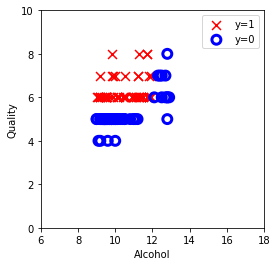

In [59]:
fig,ax = plt.subplots(1,1,figsize=(4,4))
plot_data(x, y, ax)

ax.axis([6, 18, 0, 10])
ax.set_ylabel('Quality')
ax.set_xlabel('Alcohol')

plt.show()

In [60]:
x=np.array(x)
y=np.array(y).reshape(-1,1)
print(x.shape, y.shape)

(115, 2) (115, 1)


NORMALIZE DATA

In [64]:
print(f"alcohol Max, Min pre normalization: {np.max(x[:,0]):0.2f}, {np.min(x[:,0]):0.2f}")
print(f"quality    Max, Min pre normalization: {np.max(x[:,1]):0.2f}, {np.min(x[:,1]):0.2f}")
norm_l = tf.keras.layers.Normalization(axis=-1)
norm_l.adapt(x)  # learns mean, variance
Xn = norm_l(x)
print(f"alcohol Max, Min post normalization: {np.max(Xn[:,0]):0.2f}, {np.min(Xn[:,0]):0.2f}")
print(f"quality    Max, Min post normalization: {np.max(Xn[:,1]):0.2f}, {np.min(Xn[:,1]):0.2f}")

alcohol Max, Min pre normalization: 12.90, 9.00
quality    Max, Min pre normalization: 8.00, 4.00
alcohol Max, Min post normalization: 2.24, -1.30
quality    Max, Min post normalization: 2.62, -1.98


In [65]:
Xt = np.tile(Xn,(1000,1))
Yt= np.tile(y,(1000,1))   
print(Xt.shape, Yt.shape)   

(115000, 2) (115000, 1)


Tensorflow Model

In [66]:
tf.random.set_seed(1234)  # applied to achieve consistent results
model = Sequential(
    [
        tf.keras.Input(shape=(2,)),
        Dense(3, activation='sigmoid', name = 'layer1'),
        Dense(1, activation='sigmoid', name = 'layer2')
     ]
)

In [67]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 layer1 (Dense)              (None, 3)                 9         
                                                                 
 layer2 (Dense)              (None, 1)                 4         
                                                                 
Total params: 13
Trainable params: 13
Non-trainable params: 0
_________________________________________________________________


In [68]:
L1_num_params = 2 * 3 + 3   # W1 parameters  + b1 parameters
L2_num_params = 3 * 1 + 1   # W2 parameters  + b2 parameters
print("L1 params = ", L1_num_params, ", L2 params = ", L2_num_params  )

L1 params =  9 , L2 params =  4


In [69]:
W1, b1 = model.get_layer("layer1").get_weights()
W2, b2 = model.get_layer("layer2").get_weights()
print(f"W1{W1.shape}:\n", W1, f"\nb1{b1.shape}:", b1)
print(f"W2{W2.shape}:\n", W2, f"\nb2{b2.shape}:", b2)

W1(2, 3):
 [[-0.342371   -0.47176337 -0.59338033]
 [ 0.43076217  0.04380083 -0.11589175]] 
b1(3,): [0. 0. 0.]
W2(3, 1):
 [[ 1.1449751]
 [ 1.0613333]
 [-0.6032051]] 
b2(1,): [0.]


In [70]:
model.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.01),
)

model.fit(
    Xt,Yt,            
    epochs=10,
)

Epoch 1/10
3594/3594 [==============================] - 13s 3ms/step - loss: 0.1156
Epoch 2/10
3594/3594 [==============================] - 12s 3ms/step - loss: 0.0067
Epoch 3/10
3594/3594 [==============================] - 12s 3ms/step - loss: 0.0015
Epoch 4/10
3594/3594 [==============================] - 12s 3ms/step - loss: 4.1984e-04
Epoch 5/10
3594/3594 [==============================] - 12s 3ms/step - loss: 1.2687e-04
Epoch 6/10
3594/3594 [==============================] - 12s 3ms/step - loss: 3.7942e-05
Epoch 7/10
3594/3594 [==============================] - 12s 3ms/step - loss: 1.0924e-05
Epoch 8/10
3594/3594 [==============================] - 13s 4ms/step - loss: 2.9893e-06
Epoch 9/10
3594/3594 [==============================] - 12s 3ms/step - loss: 8.1307e-07
Epoch 10/10
3594/3594 [==============================] - 12s 3ms/step - loss: 2.3821e-07


results

In [71]:
W1, b1 = model.get_layer("layer1").get_weights()
W2, b2 = model.get_layer("layer2").get_weights()
print("W1:\n", W1, "\nb1:", b1)
print("W2:\n", W2, "\nb2:", b2)

W1:
 [[ -6.773945   -10.374419    -3.3800576 ]
 [ 14.603253     0.28381065 -10.952009  ]] 
b1: [ 4.4896116 14.281558  -2.5798912]
W2:
 [[  7.3675413]
 [ 51.017693 ]
 [-47.4583   ]] 
b2: [-24.841784]


Test prediction

In [72]:
X_test = np.array([
    [10,6],  # postive example
    [13,8]])   # negative example
X_testn = norm_l(X_test)
predictions = model.predict(X_testn)
print("predictions = \n", predictions)

1/1 [==============================] - 0s 133ms/step
predictions = 
 [[1.0000000e+00]
 [2.5910083e-08]]


In [73]:
yhat = np.zeros_like(predictions)
for i in range(len(predictions)):
    if predictions[i] >= 0.5:
        yhat[i] = 1
    else:
        yhat[i] = 0
print(f"decisions = \n{yhat}")

decisions = 
[[1.]
 [0.]]


GRAPH

In [89]:
def plot_data_model(model, X, ax, pos_label="y=1", neg_label="y=0", s=80, loc='best',idx=0,idy=1 ):
    """ plots logistic data with two axis """
    # Find Indices of Positive and Negative Examples
    
    yhat = np.zeros_like(model)
    for i in range(len(model)):
        if model[i] >= 0.5:
            yhat[i] = 1
        else:
            yhat[i] = 0
    y=yhat  
    print(y)  
    pos=[]
    neg=[]
    idpos=[]
    idneg=[]
    for loop in range(len(y)):
        if(y[loop]==1):
            idpos.append(X[loop,idx])
            pos.append(X[loop,idy])
        else:
            idneg.append(X[loop,idx])
            neg.append(X[loop,idy])

    # Plot examples
    ax.scatter(idpos, pos, marker='x', s=s, c = 'red', label=pos_label)
    ax.scatter(idneg, neg, marker='o', s=s, label=neg_label, facecolors='none', edgecolors='blue', lw=3)
    ax.legend(loc=loc)

    ax.figure.canvas.toolbar_visible = False
    ax.figure.canvas.header_visible = False
    ax.figure.canvas.footer_visible = False

4/4 [==============================] - 0s 3ms/step
[[2.8417808e-09]
 [6.3669020e-10]
 [2.8417808e-09]
 [1.0000000e+00]
 [6.1311706e-10]
 [5.7170818e-10]
 [1.0003293e-09]
 [1.0000000e+00]
 [1.5024456e-09]
 [2.8417808e-09]
 [6.1311706e-10]
 [1.0000000e+00]
 [5.7170818e-10]
 [6.9622543e-09]
 [6.0094646e-10]
 [6.0305000e-10]
 [1.0000000e+00]
 [1.0000000e+00]
 [2.0634795e-08]
 [2.6729600e-08]
 [1.0000000e+00]
 [1.0000000e+00]
 [2.8417808e-09]
 [1.0000000e+00]
 [1.0000000e+00]
 [1.7154391e-11]
 [1.0000000e+00]
 [1.0000000e+00]
 [1.0000000e+00]
 [1.0000000e+00]
 [6.9622543e-09]
 [1.0000000e+00]
 [9.6337338e-10]
 [1.0000000e+00]
 [1.0000000e+00]
 [1.0000000e+00]
 [1.0000000e+00]
 [2.8417808e-09]
 [2.8417808e-09]
 [1.0000000e+00]
 [1.8185295e-11]
 [6.1234107e-10]
 [7.8576667e-10]
 [1.0000000e+00]
 [1.5024456e-09]
 [1.5024456e-09]
 [1.0000000e+00]
 [1.5909858e-07]
 [6.1311706e-10]
 [1.5909858e-07]
 [5.7170818e-10]
 [1.0003293e-09]
 [1.0003293e-09]
 [1.5024456e-09]
 [1.0000000e+00]
 [1.0000000e+0

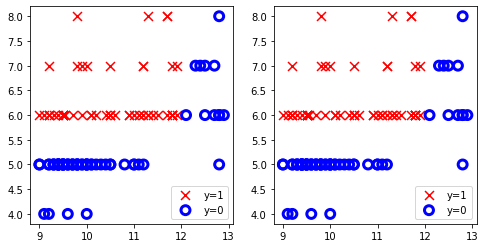

In [90]:
netf= model.predict(norm_l(x))
print(netf)
fig,ax = plt.subplots(1,2,figsize=(8,4))
plot_data_model(netf, x, ax[1])
plot_data(x, y, ax[0])



The network demonstrated the ability of neural networks to handle complex decisions by dividing the decisions between multiple units.